# Regression using Regularizations

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading the dataset
df = pd.read_csv("E:\\Datas\\HousingData.csv")
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# EDA

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isnull().sum() # Checking missing values

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Handling missing values
columns_with_missing_values = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

# Initializing SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

for column in columns_with_missing_values:
        df[column] = imputer.fit_transform(df[[column]])

In [7]:
df.isnull().sum() # Verifying that there are no missing values after imputation.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


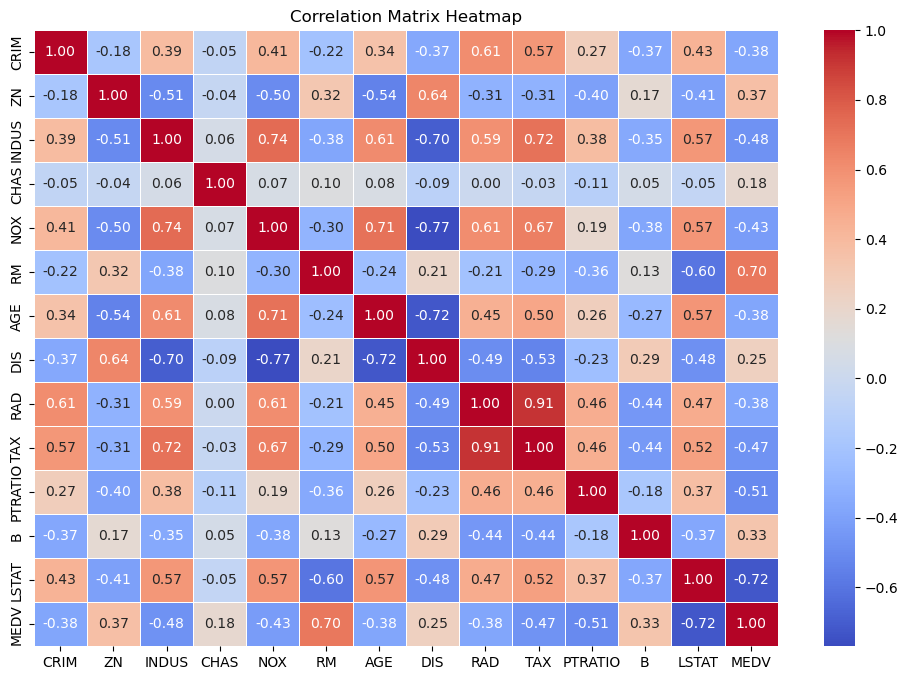

In [9]:
# Visualize the correlation matrix as a heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
# Split the data into features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [11]:
#Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Regression using Ridge Regularization

In [13]:
# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': np.logspace(-3, 3, 13)}
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

In [14]:
print("Best Parameters:", ridge_grid.best_params_)
print("Best R-squared Score:", ridge_grid.best_score_)

Best Parameters: {'alpha': 10.0}
Best R-squared Score: 0.7134353684668026


In [15]:
# Evaluate the models on the test set
ridge_pred = best_ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f'Ridge Regression R-squared: {ridge_r2:.4f}')
print(f'Mean Squared Error (MSE): {ridge_mse:.4f}')

Ridge Regression R-squared: 0.6581
Mean Squared Error (MSE): 25.0735


# Regression using Lasso Regularization

In [16]:
# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': np.logspace(-3, 3, 13)}
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

In [17]:
print("Best Parameters:", lasso_grid.best_params_)
print("Best R-squared Score:", lasso_grid.best_score_)

Best Parameters: {'alpha': 0.001}
Best R-squared Score: 0.7127664466798782


In [18]:
# Evaluate the models on the test set
lasso_pred = best_lasso.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print(f'Lasso Regression R-squared: {lasso_r2:.4f}')
print(f'Mean Squared Error (MSE): {lasso_mse:.4f}')

Lasso Regression R-squared: 0.6588
Mean Squared Error (MSE): 25.0214


# Regression using Elastic Net Regularization

In [19]:
# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net_params = {'alpha': np.logspace(-3, 3, 13), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}
elastic_net_grid = GridSearchCV(elastic_net, elastic_net_params, scoring='r2', cv=5)
elastic_net_grid.fit(X_train, y_train)
best_elastic_net = elastic_net_grid.best_estimator_

In [20]:
print("Best Parameters:", elastic_net_grid.best_params_)
print("Best R-squared Score:", elastic_net_grid.best_score_)

Best Parameters: {'alpha': 0.03162277660168379, 'l1_ratio': 0.01}
Best R-squared Score: 0.7134197638741209


In [21]:
# Evaluate the models on the test set
elastic_net_pred = best_elastic_net.predict(X_test)

elastic_net_r2 = r2_score(y_test, elastic_net_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)

print(f'Elastic Net Regression R-squared: {elastic_net_r2:.4f}')
print(f'Mean Squared Error (MSE): {elastic_net_mse:.4f}')

Elastic Net Regression R-squared: 0.6579
Mean Squared Error (MSE): 25.0909


#### In evaluating Ridge, Lasso, and Elastic Net regression models on the Boston Housing dataset, all three demonstrated reasonable predictive performance. The R-squared scores indicate that each model captures approximately 65% of the variance in the target variable. While Lasso slightly outperforms Ridge and Elastic Net, the differences are marginal. Mean Squared Error values for all models are relatively close, confirming their comparable predictive accuracy. 
#### Ultimately, the choice among these models depends on the specific requirements, with Lasso being a potential preference for its slight edge in R-squared. Overall, these models offer viable options for regression tasks on the given dataset.